<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/08_Image_FFT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FFT

https://youtu.be/Wka_XhcZAcQ

In [2]:
import cv2
import imageio
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap

import warnings
warnings.filterwarnings('ignore')

In [20]:
%%capture
!wget https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true

In [24]:
img = cv2.imread('woman2.jpg?raw=true', 0)

img = img[::2,::2]

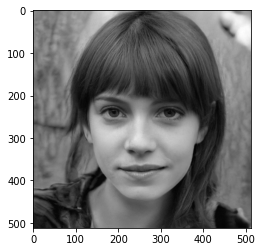

In [25]:
plt.imshow(img, cmap='gray')

image shape =  (512, 512)
dft shape   =  (512, 512, 2)


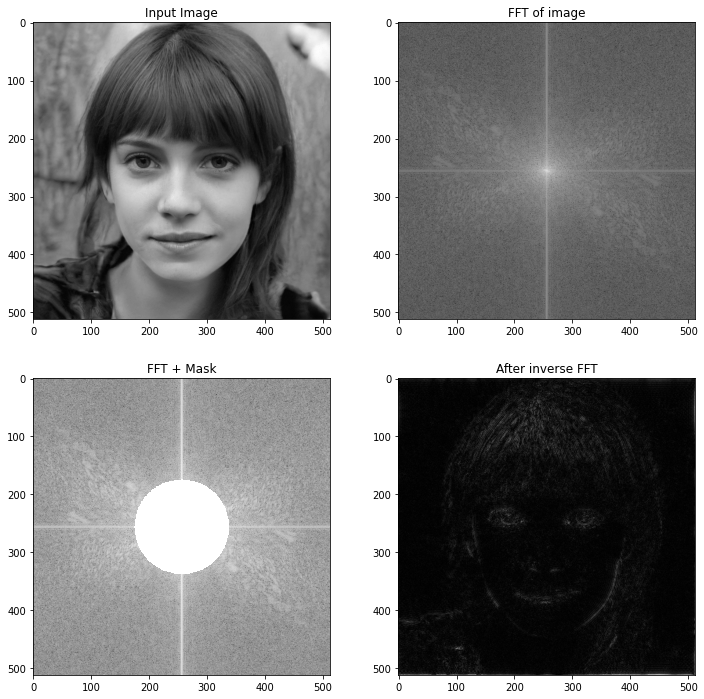

In [26]:
#Output is a 2D complex array. 1st channel real and 2nd imaginary
#For fft in opencv input image needs to be converted to float32
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

print('image shape = ', img.shape)
print('dft shape   = ', dft.shape)

#Rearranges a Fourier transform X by shifting the zero-frequency 
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

##Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log. 
#So we can add 1 to the array to avoid seeing a warning. 
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#
"""
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1
"""


# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()

In [31]:
def f(radius):
  dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

  dft_shift = np.fft.fftshift(dft)

  magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

  rows, cols = img.shape
  crow, ccol = int(rows / 2), int(cols / 2)

  mask = np.ones((rows, cols, 2), np.uint8)
  r = radius
  center = [crow, ccol]
  x, y = np.ogrid[:rows, :cols]
  mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
  mask[mask_area] = 0

  # apply mask and inverse DFT
  fshift = dft_shift * mask

  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



  fig = plt.figure(figsize=(8, 8))
  ax1 = fig.add_subplot(2,2,1)
  ax1.imshow(img, cmap='gray')
  ax1.title.set_text('Input Image')
  ax2 = fig.add_subplot(2,2,2)
  ax2.imshow(magnitude_spectrum, cmap='gray')
  ax2.title.set_text('FFT of image')
  ax3 = fig.add_subplot(2,2,3)
  ax3.imshow(fshift_mask_mag, cmap='gray')
  ax3.title.set_text('FFT + Mask')
  ax4 = fig.add_subplot(2,2,4)
  ax4.imshow(img_back, cmap='gray')
  ax4.title.set_text('After inverse FFT')
  plt.show()

In [32]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [35]:
interact(f,  radius=widgets.IntSlider(min=0, max=80, step=1, value=80));

interactive(children=(IntSlider(value=80, description='radius', max=80), Output()), _dom_classes=('widget-inte…

https://youtu.be/dZrShAGqT44?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&t=22

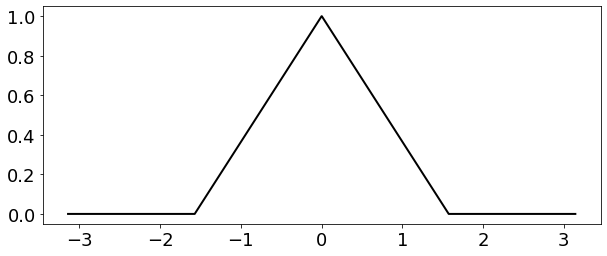

In [22]:
plt.rcParams['figure.figsize'] =[10,4]
plt.rcParams.update({'font.size' : 18})

# Define domain
deltaX = 0.001
L = np.pi
x = L* np.arange(-1+deltaX, 1+deltaX, deltaX)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n) * np.arange(0, nquart)

fig, ax = plt.subplots()
ax.plot(x, f, '-', color='k', lw=2)



In [23]:
# Compute Fourier series
name = 'Accent'
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

$$
f(x) = \sum_{k=0}^{\inf} a_k cos \left( K \frac{2 \pi x}{L} \right) + b_k sin \left( K \frac{2 \pi x}{L} \right)
$$

<br>

$a_k$ az $f(x)$ és a másik függvény belső szorzata (inner product), vagy páronkénti szorzata, vagy páronkénti skaláris szorzata. (np.dot(f(x),..) mindent pont párra és ami ebből elő áll az $a_k$ az egy vektor ami minden $k$-ra nézve tartalmaz egy értéket (magyarul egy tömb az ami elő áll).

Az $a_k$ lesz az egyik vektor (tömb) ami tartalamazza a koeficienseket (minden k-hoz egyet) és a $b_k$ lesz a másik vektor ami szintén tartalamazza a k értékekezet tartozó koeficienseket.

$$
a_k = \left< f(x), K \frac{2 \pi x}{L} \right>
$$

$$
b_k = \left< f(x), K \frac{2 \pi x}{L} \right>
$$

Emlékeztetőül:

A Fourier transzformáció amit a fenti képlet megad az, hogy k=0-tól k=valameddig (k valós egész) k-hoz tartozó koeficiensel megszorozza a egyre magasabb frekvenciával rendelkező koszinusz függvényeket és egy másik együtthatóval megszoroza az egyre magasabb frekvenciával rendelkező színusz függvényeket, és ezeket összeadja.

Gyakorlatiag ezt fogjuk a programban is látni.

Számomra azért továbbra is kérdés maradt, hogy a különböző k-hoz tartozó koefficienseket, hogyan állapítja meg. De reméljük erre is fényderül.

https://youtu.be/dZrShAGqT44?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&t=76

Ja igen, valahogy úgy, hogy a fenti képletben igazából nem egyenlőség jel van, hanem közelítés. Tehát a jobboldali kijejezéssel közelítjük a baloldalon álló tetszőleges f(x) függvényt, ami a példánkban most egy ilyen kigrú háromszög.

Ja igen a koeficiensek úgy állnak elő, hogy egy sima innerproduct (vagyis a két függvény közötti különbség, távolság ha úgy vesszük) minden k-ra megnézi, hogy mekkora a különbség az adott k-hoz tartozó $K \frac{2 \pi x}{L}$ és az $f(x)$ között.


In [24]:
A0 = np.sum(f * np.ones_like(x)) * deltaX

print('f(x) = ', f)                                         # ez egy 1-d tömb
print('f(x) * np.ones_like(x) = ', f * np.ones_like(x))     # még ez is
print('np.sum(f(x) * np.ones_like(x)) = ', np.sum(f * np.ones_like(x))) # ez már skalár
print('deltaX = ', deltaX)# Ezt mi adtuk meg az elején
print('A0 = ', A0)        # Ez is skalár lesz


f(x) =  [0. 0. 0. ... 0. 0. 0.]
f(x) * np.ones_like(x) =  [0. 0. 0. ... 0. 0. 0.]
np.sum(f(x) * np.ones_like(x)) =  501.0
deltaX =  0.001
A0 =  0.501


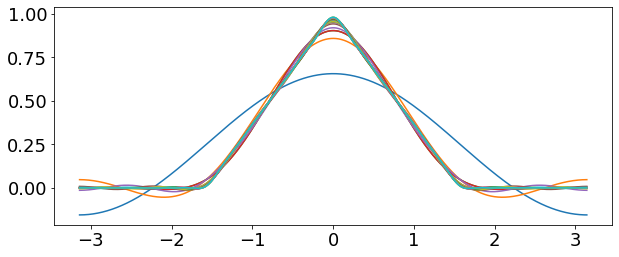

In [34]:
fFS = A0/2    #Ezt valmiért elosztja kettővel, már korábban utalt rá de nem tudom miért, valahogy a szimetriával van összefüggésben

A = np.zeros(20)
B = np.zeros(20)    # Placeholderek a koeficienseknek

fig, ax = plt.subplots()

for k in range(20):
  A[k] = np.sum(f * np.cos(np.pi * (k+1) * x / L)) * deltaX   # Inner product - egy skalár
  B[k] = np.sum(f * np.sin(np.pi * (k+1) * x / L)) * deltaX
  fFS = fFS + A[k] *np.cos(np.pi * (k+1) * x / L)  +\
              B[k] *np.sin(np.pi * (k+1) * x / L)
  ax.plot(x, fFS, '-')
plt.show()

## Ugyan ez csak nem egy ploton, hanem egymás után, hogy lehessen látni, hogyan evolválódik a magasabb frekvenciák hozzáadásával.

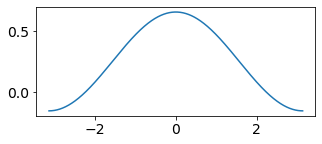

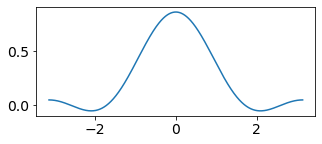

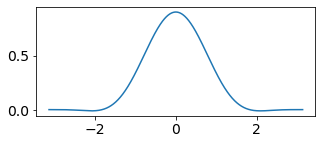

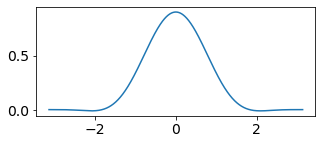

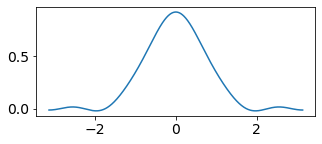

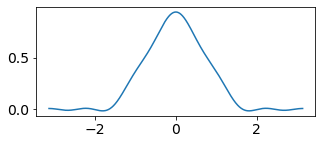

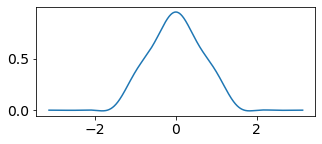

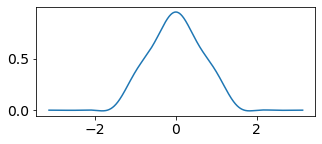

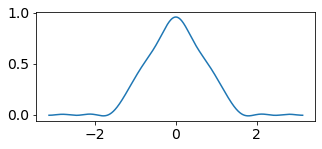

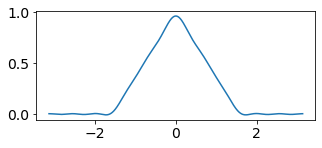

In [38]:
fFS = A0/2    #Ezt valmiért elosztja kettővel, már korábban utalt rá de nem tudom miért, valahogy a szimetriával van összefüggésben

A = np.zeros(10)
B = np.zeros(10)    # Placeholderek a koeficienseknek

plt.rcParams['figure.figsize'] =[5,2]
plt.rcParams.update({'font.size' : 14})
fig, ax = plt.subplots()

for k in range(10):
  A[k] = np.sum(f * np.cos(np.pi * (k+1) * x / L)) * deltaX   # Inner product - egy skalár
  B[k] = np.sum(f * np.sin(np.pi * (k+1) * x / L)) * deltaX
  fFS = fFS + A[k] *np.cos(np.pi * (k+1) * x / L)  +\
              B[k] *np.sin(np.pi * (k+1) * x / L)
  plt.plot(x, fFS, '-')
  plt.show()

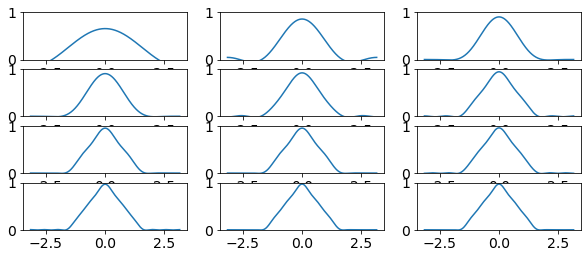

In [65]:
fFS = A0/2    #Ezt valmiért elosztja kettővel, már korábban utalt rá de nem tudom miért, valahogy a szimetriával van összefüggésben

A = np.zeros(12)
B = np.zeros(12)    # Placeholderek a koeficienseknek

plt.rcParams['figure.figsize'] =[10,4]
plt.rcParams.update({'font.size' : 14})
fig, ax = plt.subplots(4, 3)
i = -1

for k in range(12):
  A[k] = np.sum(f * np.cos(np.pi * (k+1) * x / L)) * deltaX   # Inner product - egy skalár
  B[k] = np.sum(f * np.sin(np.pi * (k+1) * x / L)) * deltaX
  fFS = fFS + A[k] *np.cos(np.pi * (k+1) * x / L)  +\
              B[k] *np.sin(np.pi * (k+1) * x / L)

  if(k%3 == 0):
    i = i + 1
  j = k%3
  ax[i,j].plot(x, fFS, '-')
  ax[i,j].set_ylim([0,1])
plt.show()